## **Using image data, predict the gender and age range of an individual in Python.**

In [ ]:
# import required modules
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

# import argparse
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

# define the path of the face detection, age detection, and gender detection models
faceProto = "/content/opencv_face_detector.pbtxt"
faceModel = "/content/opencv_face_detector_uint8.pb"
ageProto = "/content/age_deploy.prototxt"
ageModel = "/content/age_net.caffemodel"
genderProto = "/content/gender_deploy.prototxt"
genderModel = "/content/gender_net.caffemodel"

# define the list of age buckets and gender that our age detector will predict.
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load the face detection, age detection, and gender detection models
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

Saving image7.jpg to image7.jpg
Gender : Female, conf = 1.000
Age Output : [[4.8315803e-07 1.2454155e-04 4.1832981e-01 1.4539596e-01 4.3486127e-01
  1.2746212e-03 5.0746125e-06 8.1917115e-06]]
Age : (25-32), conf = 0.435
Gender : Female, conf = 0.999
Age Output : [[1.2627590e-06 2.5670498e-04 9.9552864e-01 3.2873599e-05 3.9617340e-03
  2.0255186e-04 8.9464484e-06 7.2903144e-06]]
Age : (8-12), conf = 0.996
Gender : Female, conf = 0.990
Age Output : [[0.00321611 0.08350479 0.01159817 0.00370897 0.848618   0.03942281
  0.00881763 0.0011137 ]]
Age : (25-32), conf = 0.849
Gender : Male, conf = 0.999
Age Output : [[6.9571972e-05 1.8795419e-02 3.4254968e-01 2.1363737e-02 6.0885125e-01
  6.5905447e-03 1.5275694e-04 1.6270508e-03]]
Age : (25-32), conf = 0.609
Gender : Male, conf = 1.000
Age Output : [[1.4055717e-05 1.1401222e-03 1.6493657e-01 5.3316236e-01 2.1799278e-01
  8.2487322e-02 1.1805550e-04 1.4863737e-04]]
Age : (15-20), conf = 0.533
Gender : Male, conf = 1.000
Age Output : [[4.2883614

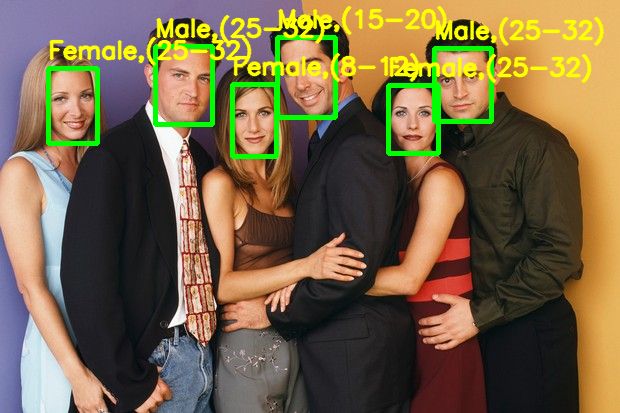

In [ ]:
from google.colab import files
uploaded = files.upload()
input = cv.imread("image7.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[1.2671414e-03 4.7658999e-05 2.8287881e-04 9.9491175e-05 8.8565616e-04
  9.6916772e-02 2.4774278e-02 8.7572604e-01]]
Age : (60-100), conf = 0.876


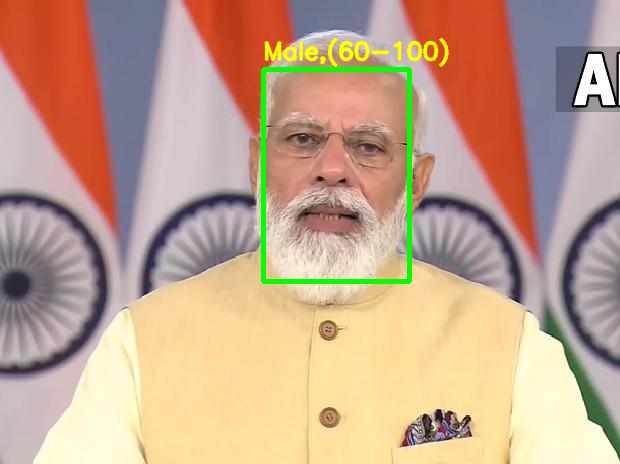

In [ ]:
input = cv.imread("image1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[0.05082968 0.02148675 0.0077583  0.00132239 0.7015137  0.19915359
  0.01545098 0.00248465]]
Age : (25-32), conf = 0.702


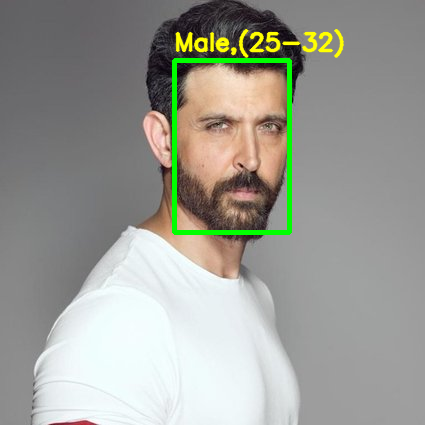

In [ ]:
input = cv.imread("image2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)